In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochrekihadiyanto","key":"66eb8d5359ab7269301c9a20151490cf"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d gauravduttakiit/smoker-status-prediction

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction
License(s): CC0-1.0
 77% 1.00M/1.30M [00:00<00:00, 1.51MB/s]
100% 1.30M/1.30M [00:00<00:00, 1.85MB/s]


In [ ]:
!unzip smoker-status-prediction.zip -d smoker-status-prediction
!ls smoker-status-prediction

Archive:  smoker-status-prediction.zip
  inflating: smoker-status-prediction/test_dataset.csv  
  inflating: smoker-status-prediction/train_dataset.csv  
test_dataset.csv  train_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [ ]:
df = pd.read_csv("/content/smoker-status-prediction/train_dataset.csv")

In [ ]:
df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8              1               1.0    61   115  125   
1        15.9              1               1.1    19    25   30   
2        13.7              3               0.6  1090  1400  276   
3        16.9              1               0.9    32    36   36   
4        14.9              1               1.2    26    28   15   

   dental caries  smoking  
0              1        1  
1              1        0  
2              0        0  
3              0        0  
4              0        0  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [ ]:
df.drop(columns=['height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','HDL','LDL','AST','ALT','Gtp','dental caries'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   systolic             38984 non-null  int64  
 2   relaxation           38984 non-null  int64  
 3   fasting blood sugar  38984 non-null  int64  
 4   Cholesterol          38984 non-null  int64  
 5   triglyceride         38984 non-null  int64  
 6   hemoglobin           38984 non-null  float64
 7   Urine protein        38984 non-null  int64  
 8   serum creatinine     38984 non-null  float64
 9   smoking              38984 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.0 MB


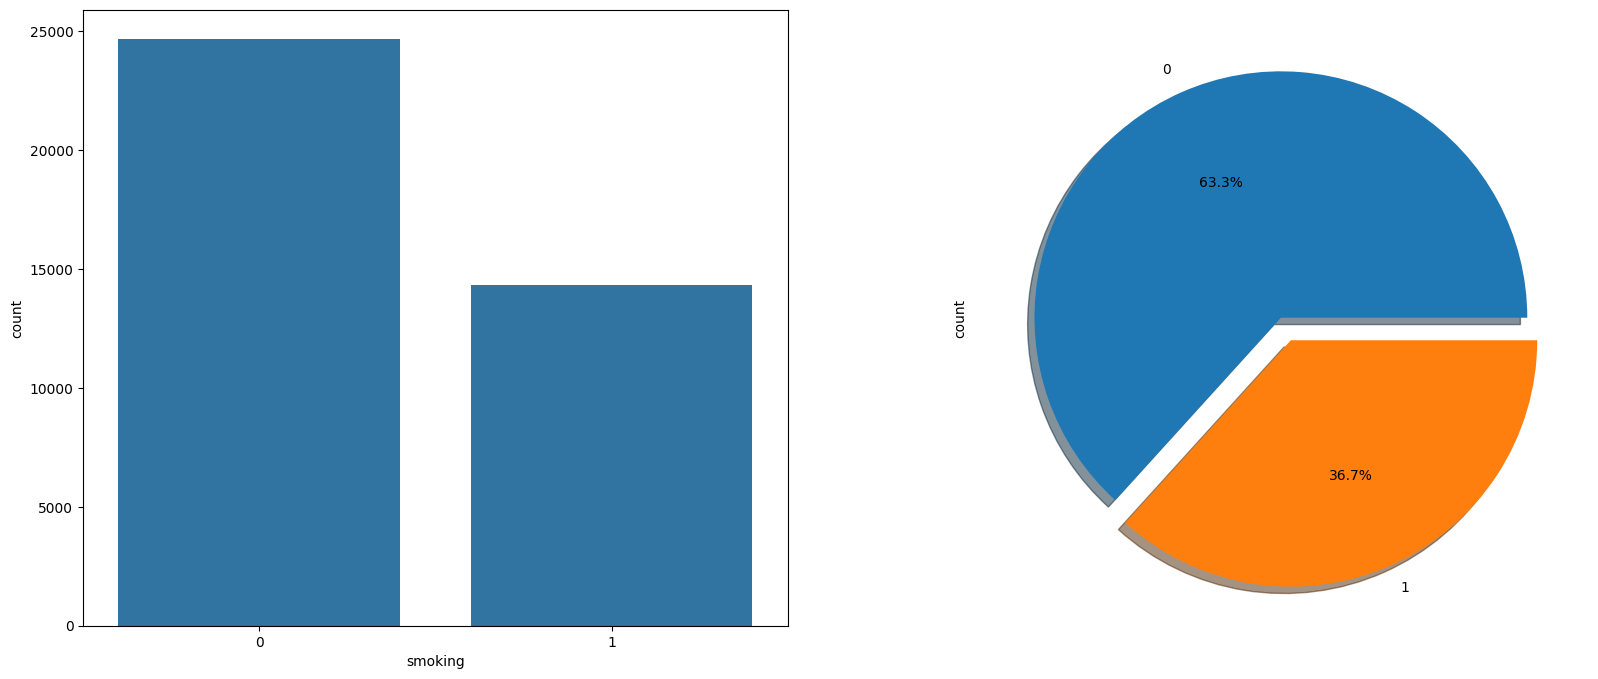

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x="smoking", ax=ax[0])
df["smoking"].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

In [ ]:
X = df.drop("smoking",axis=1)
Y = pd.get_dummies(df['smoking'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (29238, 9)
Shape of Y_train is: (29238, 2)

Shape of X_test is: (9746, 9)
Shape of Y_test is: (9746, 2)


In [ ]:
input_dim = X.shape[1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
result = model.fit(X_train, Y_train, epochs = 150, batch_size = 10)

Epoch 1/150
2924/2924 [==============================] - 8s 3ms/step - loss: 0.5371 - accuracy: 0.7042
Epoch 2/150
2924/2924 [==============================] - 8s 3ms/step - loss: 0.5372 - accuracy: 0.7023
Epoch 3/150
2924/2924 [==============================] - 8s 3ms/step - loss: 0.5367 - accuracy: 0.7059
Epoch 4/150
2924/2924 [==============================] - 7s 2ms/step - loss: 0.5378 - accuracy: 0.7028
Epoch 5/150
2924/2924 [==============================] - 8s 3ms/step - loss: 0.5374 - accuracy: 0.7035
Epoch 6/150
2924/2924 [==============================] - 8s 3ms/step - loss: 0.5371 - accuracy: 0.7023
Epoch 7/150
2924/2924 [==============================] - 7s 2ms/step - loss: 0.5366 - accuracy: 0.7044
Epoch 8/150
2924/2924 [==============================] - 8s 3ms/step - loss: 0.5352 - accuracy: 0.7052
Epoch 9/150
2924/2924 [==============================] - 6s 2ms/step - loss: 0.5358 - accuracy: 0.7058
Epoch 10/150
2924/2924 [==============================] - 8s 3ms/step - l

In [ ]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

305/305 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7116765852657501


In [ ]:
model.save('./smookerstatus.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('./smookerstatus.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./smookerstatus.tflite", "wb").write(tflite_model)

2612